# Project: Social Media Analytics (US Airline Tweets dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#dataprep">A. Data Preparation</a></li>
<li><a href="#eda"> B. Exploratory Data Analysis from Dataset</a></li>
<li><a href="#modeling">C. Modeling</a></li>
</ul>

<a id='intro'></a>
## Introduction

>### **Overview**
>To complete my Data Analysis project I am using US Airline Tweets dataset. 

>This data set contains information about 14.000 tweets. It consist of 15 columns such as text of tweet, airline_sentiment, tweet_created, etc.   

>#### **Question that can analysed from this data set**
> 1. The number of tweets each airlines has received
> 2. The number of each type of sentiments  
> 3. The total number of negative reasons
> 4. Airline sentiment from each airline
> 5. Visualization using wordcloud for the negative,positive and neutral tweets
> 6. Negative tweets based on date and tweet_created
> 7. Splitting the data into train and test to making some models
> 8. Making confussion matrices and get the accuration from each models

In [128]:
#!pip install wordcloud 

#import libraries
import pandas as pd 
import numpy as np

#Authentication module. for documentation
import tweepy as tp

#import nltk module 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

#import reguler expression 
import re

#visualization 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dwilar064174\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<a id='dataprep'></a>

# A. Data Preparation

In [129]:
df=pd.read_csv('tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,567588278875213824,neutral,1.0,NaN,NaN,Delta,NaN,JetBlueNews,NaN,0,@JetBlue's new CEO seeks the right balance to ...,NaN,2015-02-16 23:36:05 -0800,USA,Sydney
1,567590027375702016,negative,1.0,Can't Tell,0.6503,Delta,NaN,nesi_1992,NaN,0,@JetBlue is REALLY getting on my nerves !! 😡😡 ...,NaN,2015-02-16 23:43:02 -0800,undecided,Pacific Time (US & Canada)
2,567591480085463040,negative,1.0,Late Flight,0.3460,United,NaN,CPoutloud,NaN,0,@united yes. We waited in line for almost an h...,NaN,2015-02-16 23:48:48 -0800,"Washington, DC",NaN
3,567592368451248130,negative,1.0,Late Flight,1.0000,United,NaN,brenduch,NaN,0,@united the we got into the gate at IAH on tim...,NaN,2015-02-16 23:52:20 -0800,NaN,Buenos Aires
4,567594449874587648,negative,1.0,Customer Service Issue,0.3451,Southwest,NaN,VahidESQ,NaN,0,@SouthwestAir its cool that my bags take a bit...,NaN,2015-02-17 00:00:36 -0800,"Los Angeles, CA",Pacific Time (US & Canada)


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14485 entries, 0 to 14484
Data columns (total 15 columns):
tweet_id                        14485 non-null int64
airline_sentiment               14485 non-null object
airline_sentiment_confidence    14485 non-null float64
negativereason                  9082 non-null object
negativereason_confidence       10416 non-null float64
airline                         14485 non-null object
airline_sentiment_gold          40 non-null object
name                            14485 non-null object
negativereason_gold             32 non-null object
retweet_count                   14485 non-null int64
text                            14485 non-null object
tweet_coord                     1007 non-null object
tweet_created                   14485 non-null object
tweet_location                  9798 non-null object
user_timezone                   9710 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 1.7+ MB


In [131]:
#get text, airline_sentiment, negativereason, airline, retweet_count, text,tweet_location
dataset=df[['airline_sentiment', 'negativereason', 'airline', 'retweet_count', 'text','tweet_location','tweet_created']]
dataset.head()

,airline_sentiment,negativereason,airline,retweet_count,text,tweet_location,tweet_created
0,neutral,NaN,Delta,0,@JetBlue's new CEO seeks the right balance to ...,USA,2015-02-16 23:36:05 -0800
1,negative,Can't Tell,Delta,0,@JetBlue is REALLY getting on my nerves !! 😡😡 ...,undecided,2015-02-16 23:43:02 -0800
2,negative,Late Flight,United,0,@united yes. We waited in line for almost an h...,"Washington, DC",2015-02-16 23:48:48 -0800
3,negative,Late Flight,United,0,@united the we got into the gate at IAH on tim...,NaN,2015-02-16 23:52:20 -0800
4,negative,Customer Service Issue,Southwest,0,@SouthwestAir its cool that my bags take a bit...,"Los Angeles, CA",2015-02-17 00:00:36 -0800


<a id='eda'></a>
#  B : Exploratory Data Analysis from Dataset

## B.1. Simply EDA

In [65]:
#dataset shape
dataset.shape

(14485, 6)

In [66]:
#counting the number of tweets each airlines has received 
dataset.airline.value_counts()

United            3822
US Airways        2913
American          2604
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

Text(0,0.5,'No. of Tweets')

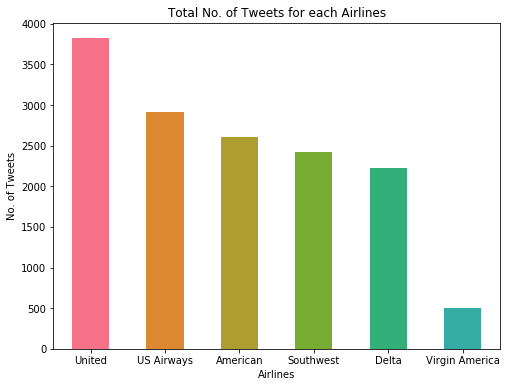

In [67]:
#Plotting the number of tweets each airlines has received
colors=sns.color_palette("husl", 10) 
pd.Series(dataset["airline"]).value_counts().plot(kind = "bar",
                        color=colors,figsize=(8,6),fontsize=10,rot = 0, title = "Total No. of Tweets for each Airlines")
plt.xlabel('Airlines', fontsize=10)
plt.ylabel('No. of Tweets', fontsize=10)

In [68]:
#counting the number of each type of sentiments 
dataset.airline_sentiment.value_counts()

negative    9082
neutral     3069
positive    2334
Name: airline_sentiment, dtype: int64

Text(0,0.5,'No. of Tweets')

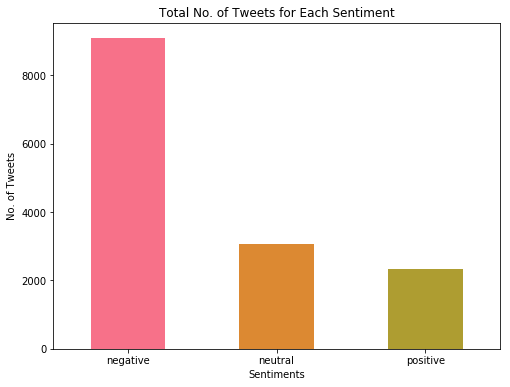

In [69]:
#Plotting the number of each type of sentiments 
colors=sns.color_palette("husl", 10)
pd.Series(dataset["airline_sentiment"]).value_counts().plot(kind = "bar",
                                    color=colors,figsize=(8,6),rot=0, title = "Total No. of Tweets for Each Sentiment")
plt.xlabel('Sentiments', fontsize=10)
plt.ylabel('No. of Tweets', fontsize=10)

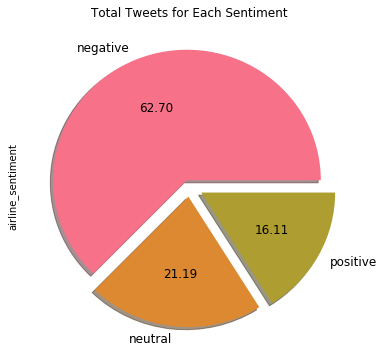

In [72]:
colors=sns.color_palette("husl", 10)
pd.Series(dataset["airline_sentiment"]).value_counts().plot(kind="pie",colors=colors,
    labels=["negative", "neutral", "positive"],explode=[0.05,0.08,0.1],
    shadow=True,autopct='%.2f', fontsize=12,figsize=(6, 6),title = "Total Tweets for Each Sentiment")

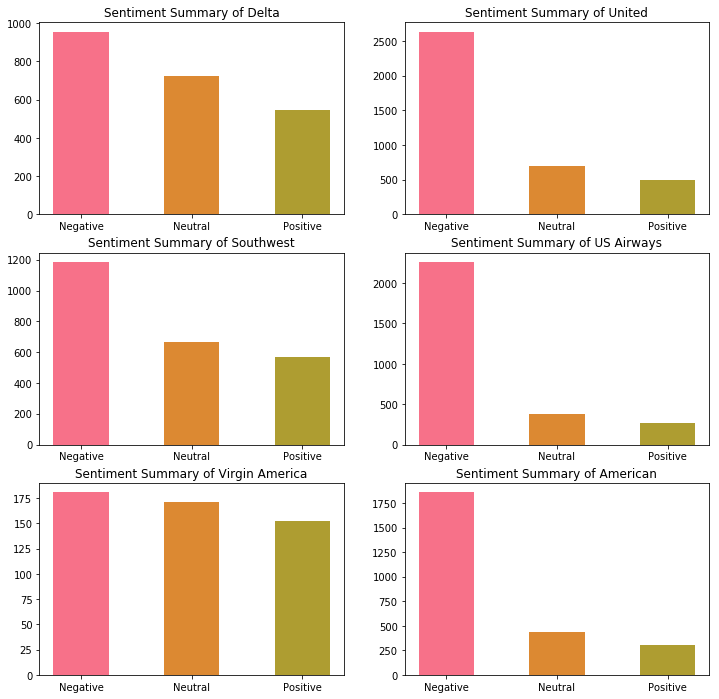

In [74]:
def plot_sub_sentiment(Airline):
    pdf = dataset[dataset['airline']==Airline]
    count = pdf['airline_sentiment'].value_counts()
    Index = [1,2,3]
    color=sns.color_palette("husl", 10)
    plt.bar(Index,count,width=0.5,color=color)
    plt.xticks(Index,['Negative','Neutral','Positive'])
    plt.title('Sentiment Summary of' + " " + Airline)

airline_name = dataset['airline'].unique()
plt.figure(1,figsize=(12,12))
for i in range(6):
    plt.subplot(3,2,i+1)
    plot_sub_sentiment(airline_name[i])

## B.2. Negative Reasons

In [76]:
#counting the total number of negative reasons
dataset.negativereason.value_counts()

Customer Service Issue         2885
Late Flight                    1650
Can't Tell                     1176
Cancelled Flight                829
Lost Luggage                    719
Bad Flight                      575
Flight Booking Problems         523
Flight Attendant Complaints     475
longlines                       177
Damaged Luggage                  73
Name: negativereason, dtype: int64

Text(0,0.5,'No. of Tweets')

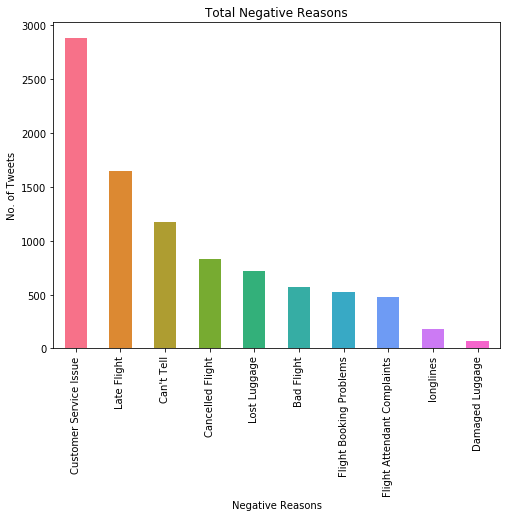

In [77]:
#Plotting all the negative reasons 
color=sns.color_palette("husl", 10)
pd.Series(dataset["negativereason"]).value_counts().plot(kind = "bar",
                        color=color,figsize=(8,6),title = "Total Negative Reasons")
plt.xlabel('Negative Reasons', fontsize=10)
plt.ylabel('No. of Tweets', fontsize=10)

In [78]:
dataset.negativereason.value_counts().head(5)

Customer Service Issue    2885
Late Flight               1650
Can't Tell                1176
Cancelled Flight           829
Lost Luggage               719
Name: negativereason, dtype: int64

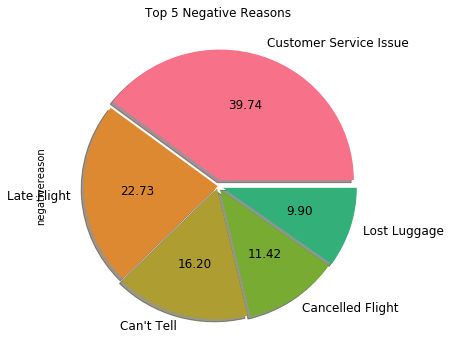

In [79]:
color=sns.color_palette("husl", 10)
pd.Series(dataset["negativereason"]).value_counts().head(5).plot(kind="pie",
                labels=["Customer Service Issue", "Late Flight", "Can't Tell","Cancelled Flight","Lost Luggage"],
                colors=color,autopct='%.2f',explode=[0.05,0,0.02,0.03,0.04],shadow=True,
                fontsize=12,figsize=(6, 6),title="Top 5 Negative Reasons")

In [81]:
air_senti=pd.crosstab(dataset.airline, dataset.airline_sentiment)
air_senti

airline_sentiment,negative,neutral,positive
airline,,,
American,1864,433,307
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


In [82]:
percent=air_senti.apply(lambda a: a / a.sum() * 100, axis=1)
percent

airline_sentiment,negative,neutral,positive
airline,,,
American,71.582181,16.628264,11.789555
Delta,42.979298,32.538254,24.482448
Southwest,49.008264,27.438017,23.553719
US Airways,77.686234,13.079300,9.234466
United,68.890633,18.236525,12.872841
Virgin America,35.912698,33.928571,30.158730


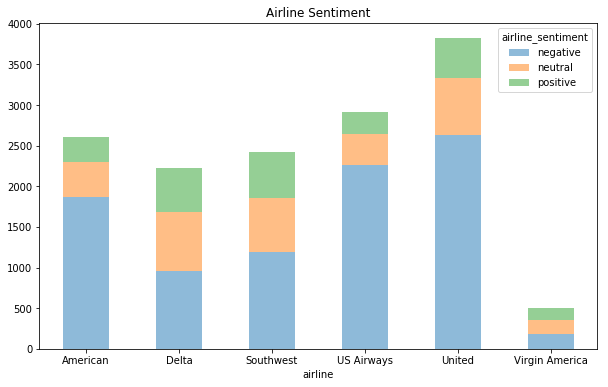

In [83]:
#airline sentiment from each airline
pd.crosstab(index = dataset["airline"],columns = dataset["airline_sentiment"]).plot(kind='bar',
                figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Airline Sentiment")

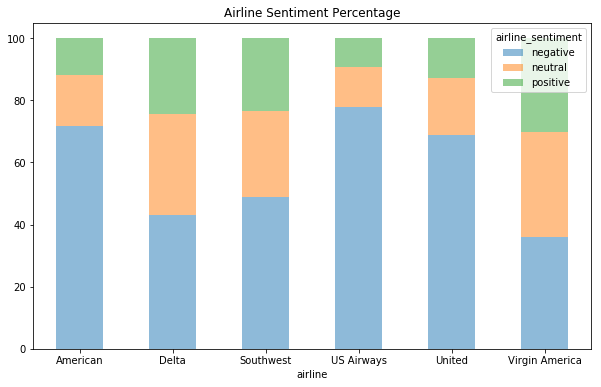

In [84]:
percent.plot(kind='bar',figsize=(10, 6),alpha=0.5,
                rot=0,stacked=True,title="Airline Sentiment Percentage")

## B.3. Wordcloud

In [132]:
#visualization using wordcloud for the negative tweets
df=dataset[dataset['airline_sentiment']=='negative']
words = ' '.join(df['text']) #making text in one paragraph
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word #not including link
                                and not word.startswith('@') # not including user_name
                                and word != 'RT']) # not including word of retweet

In [133]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

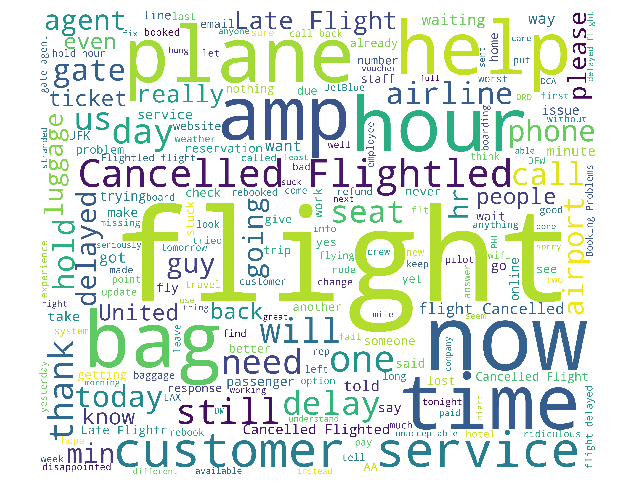

In [134]:
plt.figure(1,figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Flight, now, hour, plane, Cancelled Flightled, help, are the words much tweeted in Negative Tweets

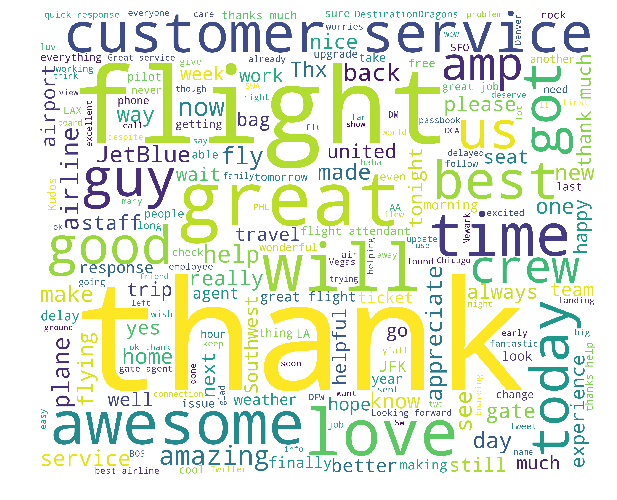

In [135]:
#visualization using wordcloud for the positive tweets
df=dataset[dataset['airline_sentiment']=='positive']
words = ' '.join(df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'])

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

plt.figure(1,figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Thank, great, good, flight, customer service, awesome are the words much tweeted in Positive Tweets

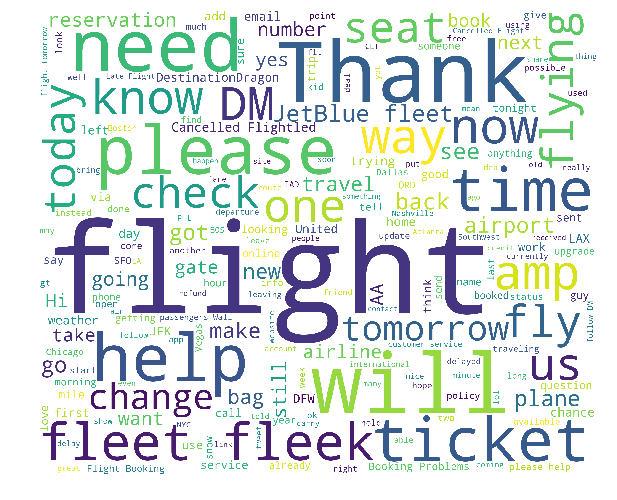

In [136]:
#visualization using wordcloud for the neutral tweets
df=dataset[dataset['airline_sentiment']=='neutral']
words = ' '.join(df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'])

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

plt.figure(1,figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Flight, thank, please, fleet, need, help are the words much tweeted in Neutral Tweets

### B.4. Negative tweets based on date and tweet_created

In [95]:
dataset['tweet_created'] = pd.to_datetime(dataset['tweet_created'])
dataset["date_created"] = dataset["tweet_created"].dt.date
dataset["date_created"]

C:\Users\dwilar064174\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\dwilar064174\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0        2015-02-17
1        2015-02-17
2        2015-02-17
3        2015-02-17
4        2015-02-17
5        2015-02-17
6        2015-02-17
7        2015-02-17
8        2015-02-17
9        2015-02-17
10       2015-02-17
11       2015-02-17
12       2015-02-17
13       2015-02-17
14       2015-02-17
15       2015-02-17
16       2015-02-17
17       2015-02-17
18       2015-02-17
19       2015-02-17
20       2015-02-17
21       2015-02-17
22       2015-02-17
23       2015-02-17
24       2015-02-17
25       2015-02-17
26       2015-02-17
27       2015-02-17
28       2015-02-17
29       2015-02-17
            ...    
14455    2015-02-24
14456    2015-02-24
14457    2015-02-24
14458    2015-02-24
14459    2015-02-24
14460    2015-02-24
14461    2015-02-24
14462    2015-02-24
14463    2015-02-24
14464    2015-02-24
14465    2015-02-24
14466    2015-02-24
14467    2015-02-24
14468    2015-02-24
14469    2015-02-24
14470    2015-02-24
14471    2015-02-24
14472    2015-02-24
14473    2015-02-24


In [97]:
day_df = dataset.groupby(['date_created','airline'])
day_df = day_df.airline_sentiment.value_counts()
day_df.unstack()

airline_sentiment            negative  neutral  positive
date_created airline                                    
2015-02-17   Delta               51.0     63.0      47.0
             Southwest          162.0     69.0      56.0
             US Airways         156.0     22.0      33.0
             United             173.0     50.0      29.0
             Virgin America      10.0     16.0      16.0
2015-02-18   Delta              127.0     84.0      78.0
             Southwest          143.0     96.0      90.0
             US Airways         259.0     29.0      44.0
             United             281.0     74.0      53.0
             Virgin America      17.0     21.0      20.0
2015-02-19   American             1.0      NaN       1.0
             Delta              127.0     68.0      74.0
             Southwest          103.0    102.0      86.0
             US Airways         189.0     58.0      34.0
             United             224.0     97.0      71.0
             Virgin America      22.0     21.0      20.0
2015-02-20   American             1.0      NaN       NaN
             Delta              108.0     97.0      78.0
             Southwest          139.0     98.0      73.0
             US Airways         234.0     50.0      34.0
             United             347.0    104.0      78.0
             Virgin America      20.0     34.0      17.0
2015-02-21   American             1.0      NaN       NaN
             Delta               91.0     78.0      55.0
             Southwest          219.0     77.0      64.0
             US Airways         224.0     31.0      26.0
             United             333.0     72.0      72.0
             Virgin America      33.0     14.0      28.0
2015-02-22   American           313.0     46.0      41.0
             Delta              221.0     82.0      83.0
             Southwest          143.0     52.0      53.0
             US Airways         536.0     58.0      28.0
             United             494.0    109.0      63.0
             Virgin America      34.0     20.0      12.0
2015-02-23   American          1067.0    214.0     144.0
             Delta              160.0    181.0      83.0
             Southwest          151.0    107.0      94.0
             US Airways         431.0     76.0      46.0
             United             503.0    103.0      71.0
             Virgin America      30.0     30.0      20.0
2015-02-24   American           481.0    173.0     121.0
             Delta               70.0     70.0      46.0
             Southwest          126.0     63.0      54.0
             US Airways         234.0     57.0      24.0
             United             278.0     88.0      55.0
             Virgin America      15.0     15.0      19.0

This shows the sentiments of tweets for each date from 2015-02-17 to 2015-02-24 for every airline in our dataframe.

Our next step will be to plot this and get better visualization for negative tweets.

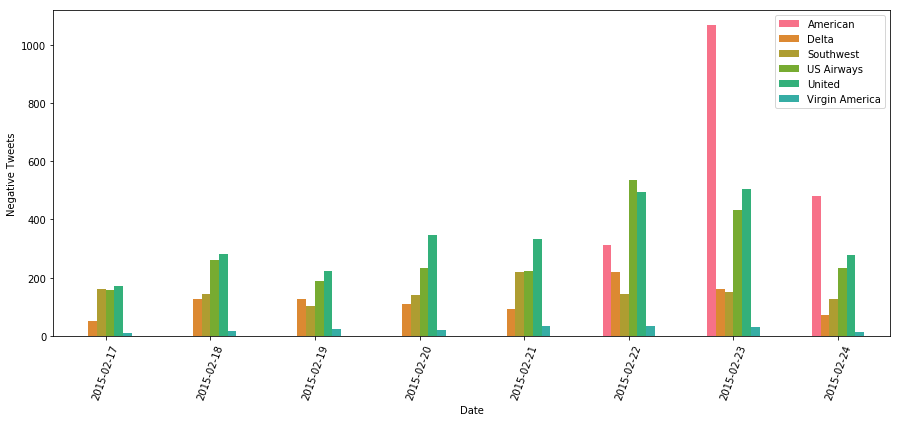

In [100]:
day_df = day_df.loc(axis=0)[:,:,'negative']

#groupby and plot data
ax2 = day_df.groupby(['date_created','airline']).sum().unstack().plot(kind = 'bar', color=color, figsize = (15,6), rot = 70)
labels = ['American','Delta','Southwest','US Airways','United','Virgin America']
ax2.legend(labels = labels)
ax2.set_xlabel('Date')
ax2.set_ylabel('Negative Tweets')
plt.show()

- Interestingly, American has a sudden upsurge in negative sentimental tweets on 2015-02-23, which reduced to half the very next day 2015-02-24. (I hope American is doing better these days and resolved their Customer Service Issue as we saw before)
- Virgin America has the least number of negative tweets throughout the weekly data that we have. It should be noted that the total number of tweets for Virgin America was also significantly less as compared to the rest airlines, and hence the least negative tweets.
- The negative tweets for all the rest airlines is slightly skewed towards the end of the week !

<a id='modeling'></a>
# C. Modeling 

## C.1. Preprocessing for Modeling

In [102]:
def tweet_to_words(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

def clean_tweet_length(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return(len(meaningful_words)) 

In [103]:
dataset['sentiment']=dataset['airline_sentiment'].apply(lambda x: 0 if x=='negative' else 1)
dataset.sentiment.head()

0    1
1    0
2    0
3    0
4    0
Name: sentiment, dtype: int64

## C.2. Train Test Split

In [106]:
from sklearn.model_selection import train_test_split

#Splitting the data into train and test
dataset['clean_tweet']=dataset['text'].apply(lambda x: tweet_to_words(x))
dataset['Tweet_length']=dataset['text'].apply(lambda x: clean_tweet_length(x))
train,test = train_test_split(dataset,test_size=0.2,random_state=42)

In [107]:
train_clean_tweet=[]
for tweets in train['clean_tweet']:
    train_clean_tweet.append(tweets)
test_clean_tweet=[]
for tweets in test['clean_tweet']:
    test_clean_tweet.append(tweets)

## C.3. Count Vectorizer 

In [108]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train_clean_tweet)
test_features=v.transform(test_clean_tweet)

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

## C.4. Classifiers

In [110]:
Classifiers = [
    LogisticRegression(C=0.000000001,solver='liblinear',max_iter=200),
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200),
    AdaBoostClassifier(),
    GaussianNB()]

## C.5. Confussion matrix

In [125]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,train['airline_sentiment'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features,train['airline_sentiment'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['airline_sentiment'])
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+'is '+str(accuracy))
    print(classification_report(pred,test['airline_sentiment']))

Accuracy of LogisticRegressionis 0.6154642733862616


C:\Users\dwilar064174\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


             precision    recall  f1-score   support

   negative       1.00      0.62      0.76      2897
    neutral       0.00      0.00      0.00         0
   positive       0.00      0.00      0.00         0

avg / total       1.00      0.62      0.76      2897

Accuracy of KNeighborsClassifieris 0.5743872972040042
             precision    recall  f1-score   support

   negative       0.63      0.75      0.68      1491
    neutral       0.46      0.31      0.37       947
   positive       0.52      0.56      0.54       459

avg / total       0.56      0.57      0.56      2897

Accuracy of SVCis 0.6154642733862616
             precision    recall  f1-score   support

   negative       1.00      0.62      0.76      2897
    neutral       0.00      0.00      0.00         0
   positive       0.00      0.00      0.00         0

avg / total       1.00      0.62      0.76      2897

Accuracy of DecisionTreeClassifieris 0.6796686227131515
             precision    recall  f1-score   supp

Text(0.5,1,'Accuracies of Models')

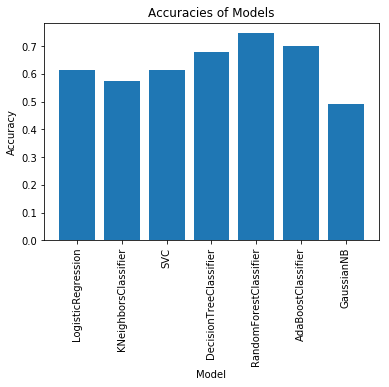

In [127]:
Index = [1,2,3,4,5,6,7]
plt.bar(Index,Accuracy)
plt.xticks(Index, Model, rotation=90)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracies of Models')

From seven models above, we know that Random Forest Classifier has the best accuration. 